# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [16]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential, ev_plot_2D
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

In [17]:
def __credal_partition_contour_lines(model, X, marker_list):
    mass = model['mass']
    clusters = np.argmax(mass, axis=1)
    contour_list = np.array([])
    datapoint_list = []
    for i in range(mass.shape[1]):
        indices = np.where(clusters == i)
        datapoints = X[indices]
        if len(datapoints) > 3:
            datapoint_list.append(datapoints)
            memberships = mass[indices, i].ravel()
            contour = plt.tricontourf(datapoints[:, 0], datapoints[:, 1], memberships, cmap='viridis', alpha=0.6)
            contour_list = np.append(contour_list, contour)
    
    plt.colorbar(contour_list[0], label='Mass value')
    
    for i in range(len(marker_list)):
        datapoints = datapoint_list[i]
        plt.scatter(datapoints[:, 0], datapoints[:, 1], marker=marker_list[i], s=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Credal partition')
    plt.show()

Instances 199 - Features 2 - Class 2
          0         1
0  3.436618  3.027574
1  4.359538  3.232653
2  4.266793  2.741403
3  2.905252  3.512543
4  3.640983  2.706501


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


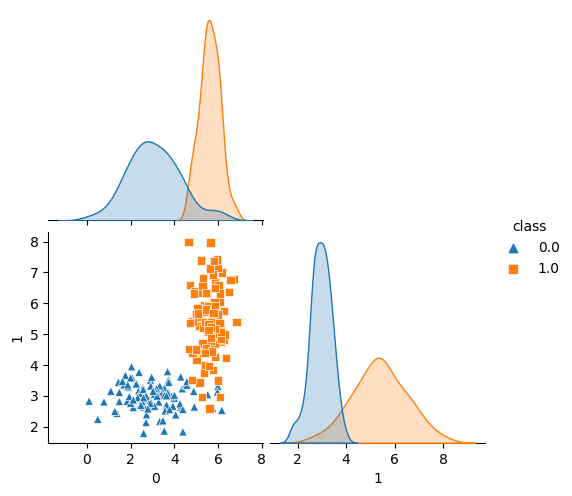

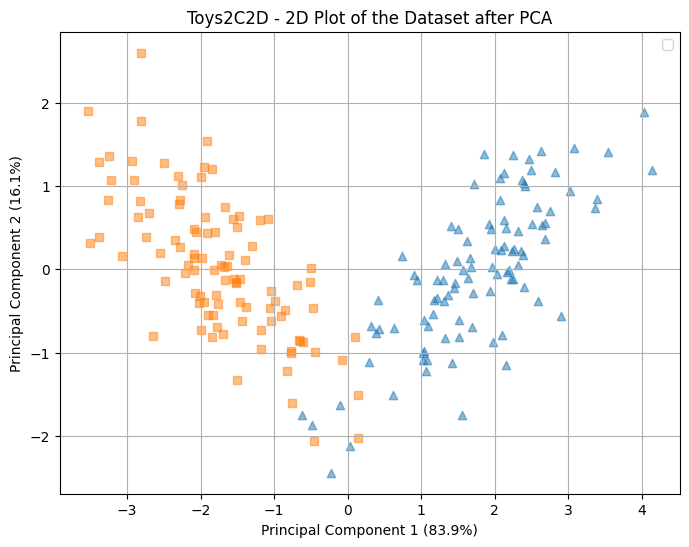

In [18]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c2dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1])
c = 2

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C2D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [19]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsi=1e-5)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

J values: [4.297252449144987, 4.297252686253738, 4.297253362729644, 4.297253419585522, 4.297253430545014, 4.297253782624283, 4.297254229945349, 4.297254673922785, 4.297254858894649, 4.297254929269636]
ARI values: [0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856]
NS values: [0.8588046673610957, 0.8720558873372217, 0.8720239355861946, 0.858820056960823, 0.8720240563545064, 0.8588217188263035, 0.8723990150933513, 0.8724133648503487, 0.8724190488183712, 0.858841611301274]
NMI values: [0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284]


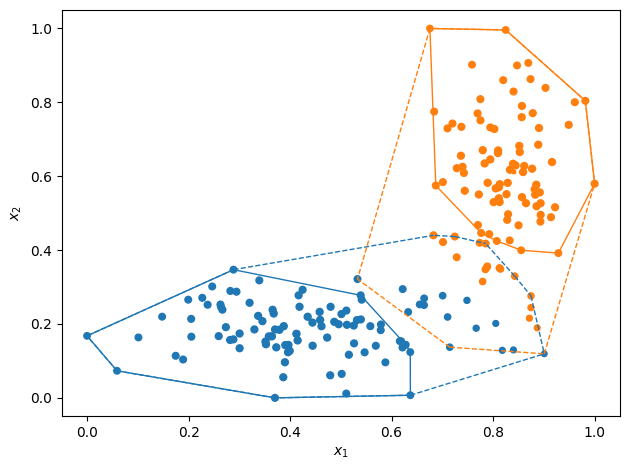

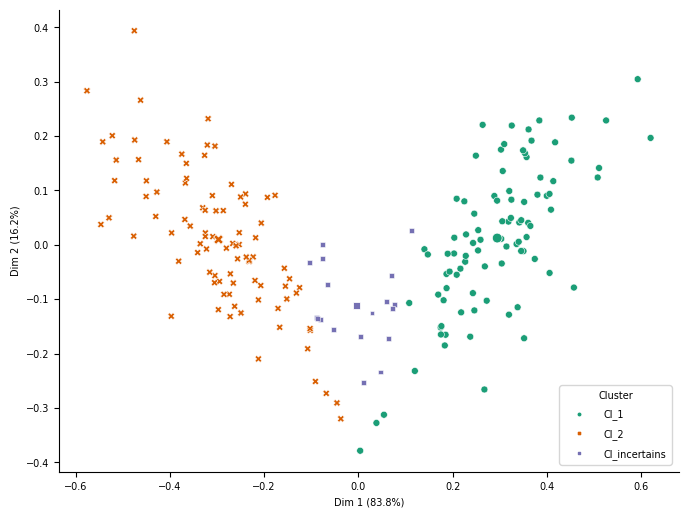

In [20]:
display_results_evidential(X, ecm_models, numeric_labels)

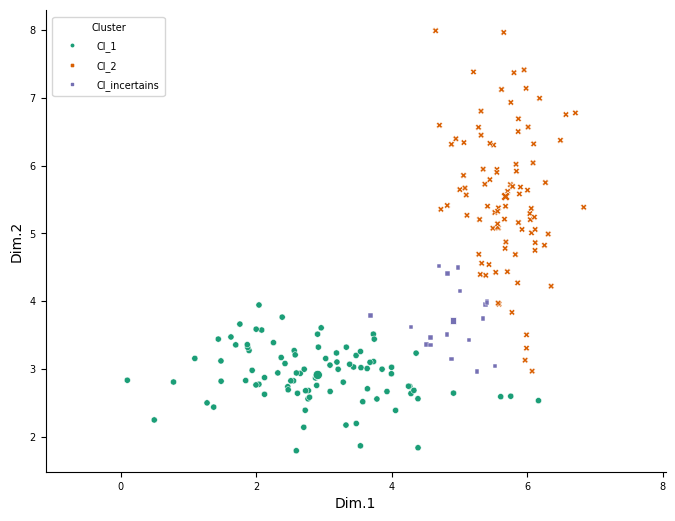

In [21]:
ev_plot_2D(data=dataset[:, :-1], x=ecm_models[0], normalize=False, cex=20)

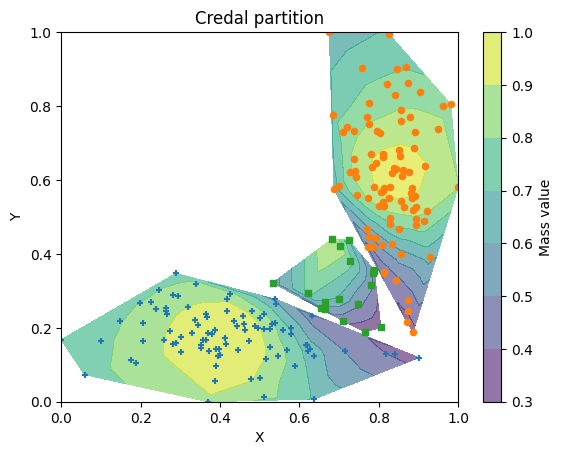

In [22]:
__credal_partition_contour_lines(ecm_models[0], X.values, ['+', 'o', 's'])

## Weighted ECM (WECM)

In [23]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsilon=1e-6)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])


J values: [0.6811123693449643, 0.6925633027704752, 0.6925633661858703, 0.692563413169152, 0.6925634630415731, 0.6925634805899117, 0.6925635428530363, 0.6925635776880117, 0.692563679943442, 0.6925637571923254]
ARI values: [0.8824407464468274, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444]
NS values: [0.9686384452347823, 0.9176479815975606, 0.8462885267160213, 0.9176477950822379, 0.9176477108237597, 0.9176476811593179, 0.9176475759348338, 0.8462884307486709, 0.9176473443236217, 0.9176472137888363]
NMI values: [0.8149890629501055, 0.7807654168335446, 0.7807654168335445, 0.7807654168335446, 0.7807654168335446, 0.7807654168335446, 0.7807654168335446, 0.7807654168335445, 0.7807654168335446, 0.7807654168335446]


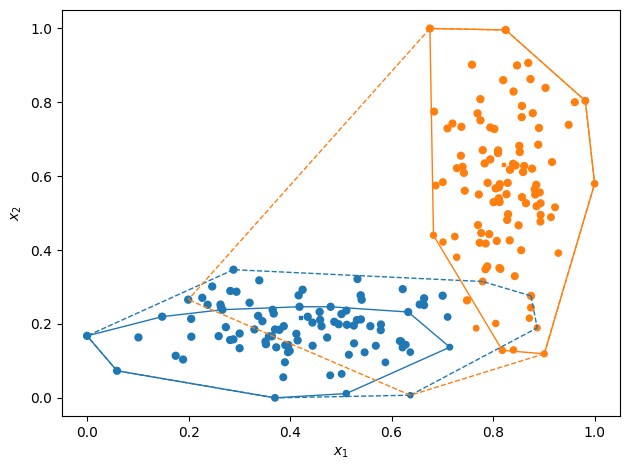

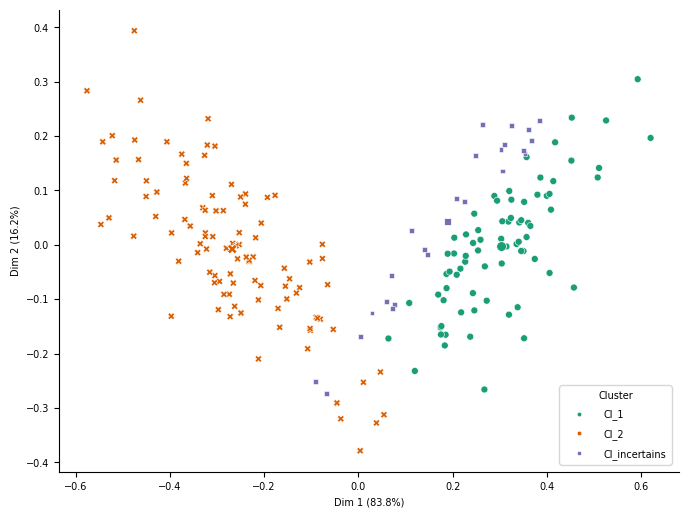

In [24]:
display_results_evidential(X, wecm_models, numeric_labels)

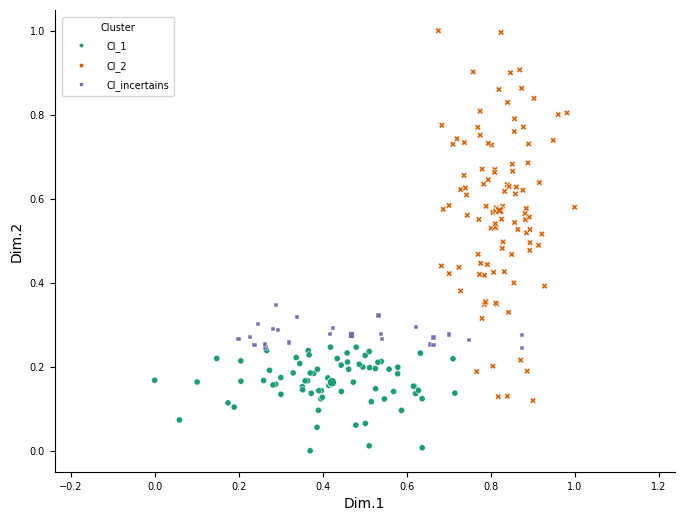

In [25]:
ev_plot_2D(data=X.values, x=wecm_models[0], normalize=False, cex=20)

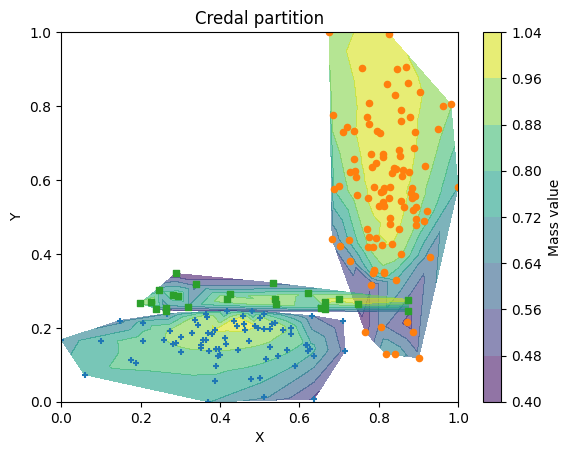

In [26]:
__credal_partition_contour_lines(wecm_models[0], X.values, ['+', 'o', 's'])

In [27]:
print(f"Top weights: {wecm_models[0]['W']}")
centers = wecm_models[0]['gplus']
print(f"Top centers: {centers}")
# plt.figure(figsize=(8, 6))
# plt.scatter(centers[:, 0], centers[:, 1], s=200)
# plt.show()

Top weights: [[0.21705304 0.78294696]
 [0.87778921 0.12221079]
 [0.01639983 0.98360017]]
Top centers: [[0.42113501 0.2171178 ]
 [0.82075143 0.63139978]
 [0.74153007 0.27305267]]


# Weighted FCM - Keller et al. 2000

In [28]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, w0=w0, init="None", verbose=True)
    keller_models = np.append(keller_models, model)

J values: [0.7089153045042147, 0.7087846600250045, 0.7087399454709133, 0.7088351141103855, 0.7088516674174116, 0.7088611501000881, 0.7087339378124798, 0.7088739596512179, 0.7088365284657083, 0.7088687612472857]
ARI values: [0.8448775281781609, 0.8448775281781609, 0.8635569191338444, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.9015253545556576, 0.9015253545556576, 0.9015253545556576]
NMI values: [0.7584955610075942, 0.7584955610075942, 0.7807654168335445, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.831384137232772, 0.831384137232772, 0.8313841372327718]


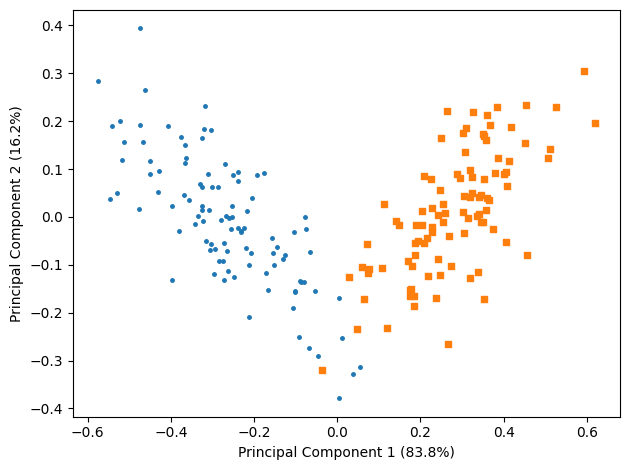

In [29]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [30]:
%%capture
wang_models = np.array([])
for i in range(5):
    model = fcm_wang2004(X, c, w_beta=3, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

J values: [1.3873118015060468, 1.3872894717559054, 1.3873648070911955, 1.3873105047601266, 1.3872950832581834]
ARI values: [0.8635567799204162, 0.8635567799204162, 0.8824396669322856, 0.8824396669322856, 0.8635567799204162]
NMI values: [0.7807787368096489, 0.7807787368096489, 0.8072262679734284, 0.8072262679734284, 0.7807787368096489]


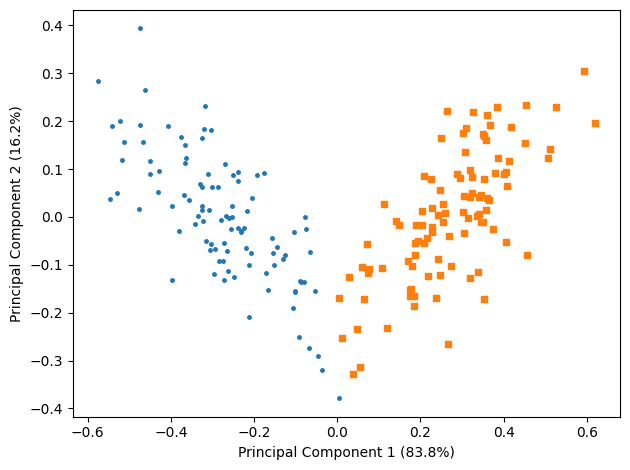

In [31]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [40]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, init="None", epsilon=1e-5)
    scad1_models = np.append(scad1_models, model)

J values: [7.21069769471304, 7.210695078274633, 7.21069010015042, 7.210687454954861, 7.210690978168156, 7.210695601906656, 7.210670017596178, 7.210660070447207, 7.210681853225433, 7.210695466366307]
ARI values: [0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162]
NMI values: [0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489]


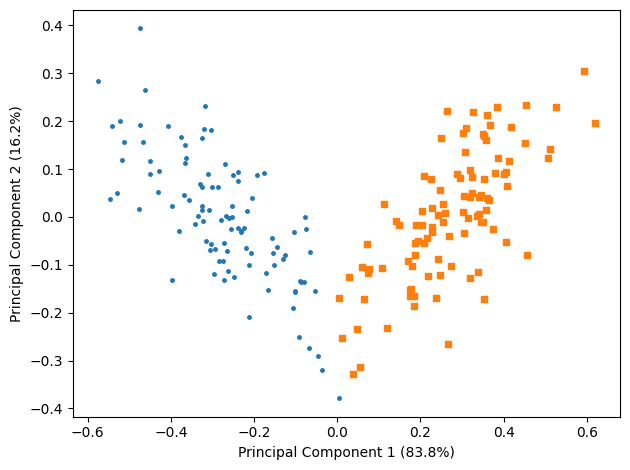

In [41]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [42]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None", epsilon=1e-5)
    scad2_models = np.append(scad2_models, model)

J values: [0.7194285633214665, 0.7194290366070734, 0.7194267743028965, 0.719426027146954, 0.7194281773101424, 0.719425862532949, 0.7194277790448269, 0.7194259990311851, 0.7194260602117417, 0.7194276938011303]
ARI values: [0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609]
NMI values: [0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942]


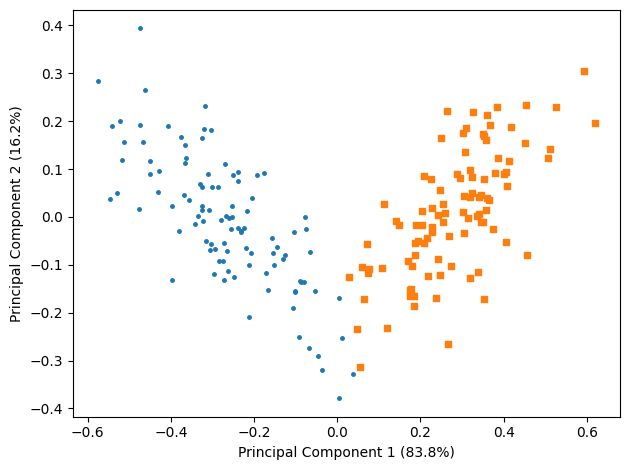

In [43]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [52]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None", epsilon=1e-9)
    ifwfcm_models = np.append(ifwfcm_models, model)

J values: [1.359473090782831, 1.3594730900477294, 1.3594730906480437, 1.359473090649375, 1.3594730966295412, 1.3594730965855202, 1.3594730971316549, 1.3594730971273634, 1.3594730907374308, 1.3594730966344564]
ARI values: [0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867]
NMI values: [0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975]


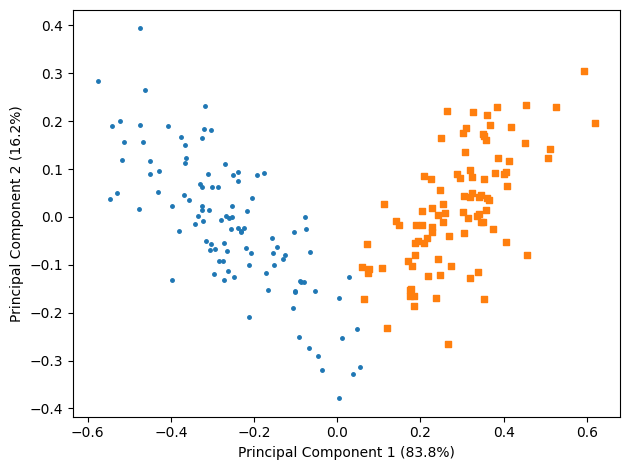

In [53]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [48]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)

J values: [17.365962764516993, 17.366245761849342, 17.36625612232167, 17.366437085703936, 17.366592636854538, 17.366295558657242, 17.366244612748083, 17.36600781356739, 17.357644522480626, 17.36639414339608]
ARI values: [0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235]
NMI values: [0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188]


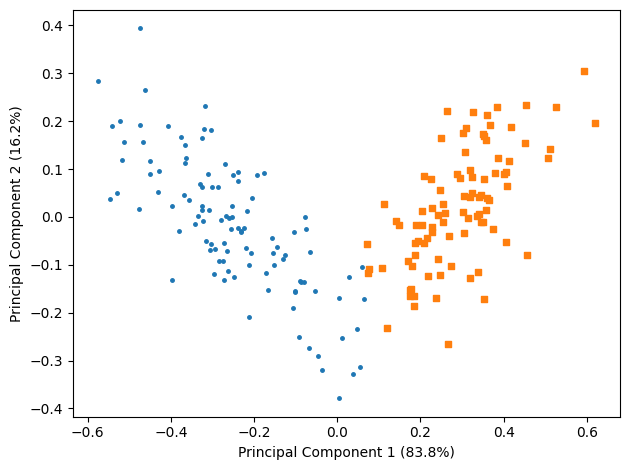

In [49]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)